In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# VaR на уровне 97% за день показывает, 
# какую долю стоимости актив может потерять 
# за день с вероятностью 3% 
# (то есть в 1 из 20 дней убыток превысит это значение)
alpha=0.03

In [35]:
# Предобработка данных

In [36]:
files_data=dict.fromkeys(['GAZP.csv', 'SBER.csv', 'MGNT.csv', 'GMKN.csv', 'LKOH.csv', 'NVTK.csv', 'ROSN.csv', 'TATN.csv', 'VTBR.csv'])

In [37]:
for file_name in files_data:
    files_data[file_name]=pd.read_csv(file_name)

In [38]:
common_dates = set(files_data['GAZP.csv']['Дата'])
for df in files_data.values():
    common_dates = common_dates.intersection(set(df['Дата']))

# Фильтрация данных: оставляем только строки с общими датами
for file_name, df in files_data.items():
    files_data[file_name] = df[df['Дата'].isin(common_dates)].reset_index(drop=True)

In [39]:
for company in files_data.values():
  company['Изм. %'] = [float(val[:-1].replace(',', '.'))/100 for val in company['Изм. %']]

In [40]:
period = len(files_data['GAZP.csv'])
sorted_data = dict.fromkeys(files_data.keys())

for company, data in files_data.items():
    sorted_data[company] = np.sort(data['Изм. %'])

In [41]:
# Cтандартный VaR

In [42]:
coef = int(period * alpha)

for company, profit in sorted_data.items():
    var_ = float(profit[coef] * 100)
    print('VaRst_{name} = {var}%'.format(name=company.rsplit('.csv')[0], var=-var_))

VaRst_GAZP = 3.1400000000000006%
VaRst_SBER = 3.6699999999999995%
VaRst_MGNT = 3.65%
VaRst_GMKN = 3.39%
VaRst_LKOH = 3.2%
VaRst_NVTK = 3.39%
VaRst_ROSN = 3.2799999999999994%
VaRst_TATN = 3.73%
VaRst_VTBR = 3.7599999999999993%


In [43]:
# График доходности

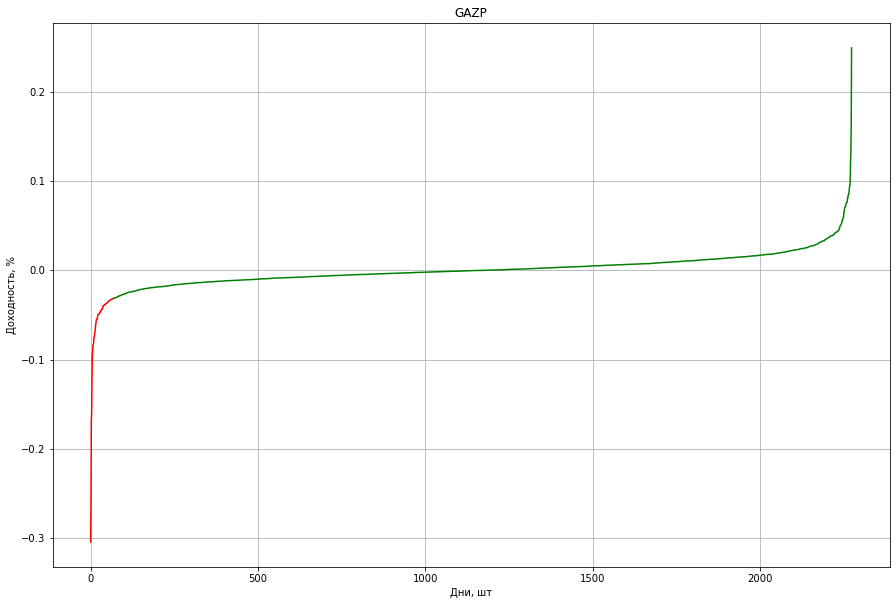

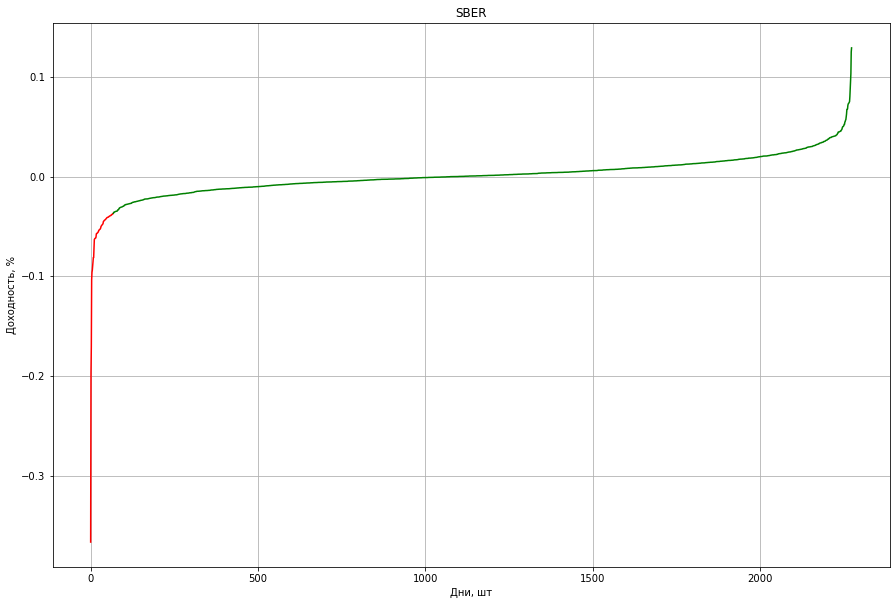

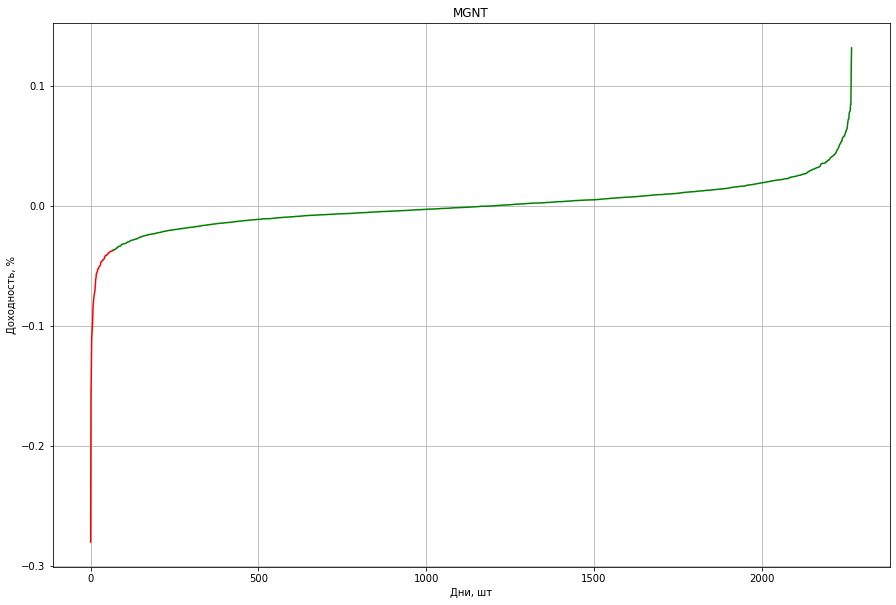

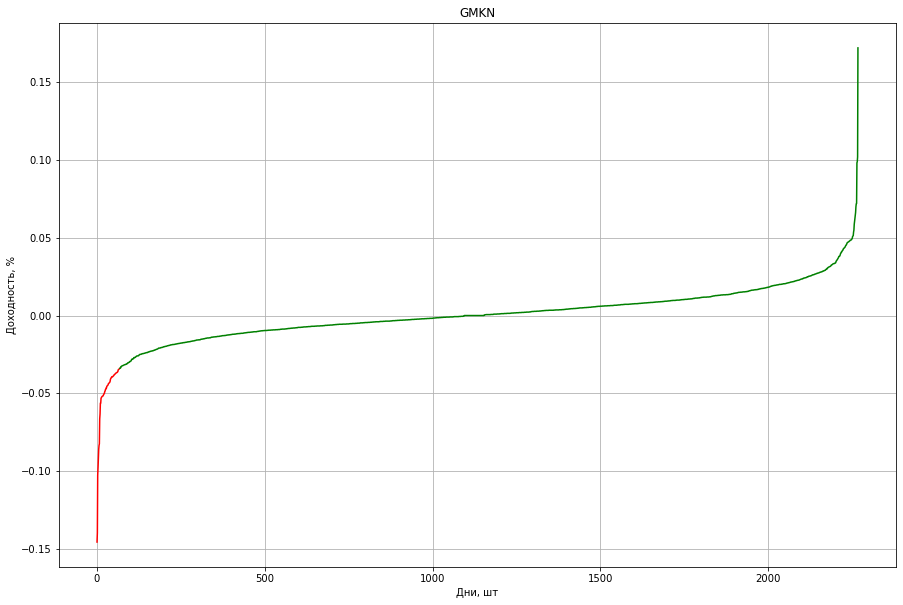

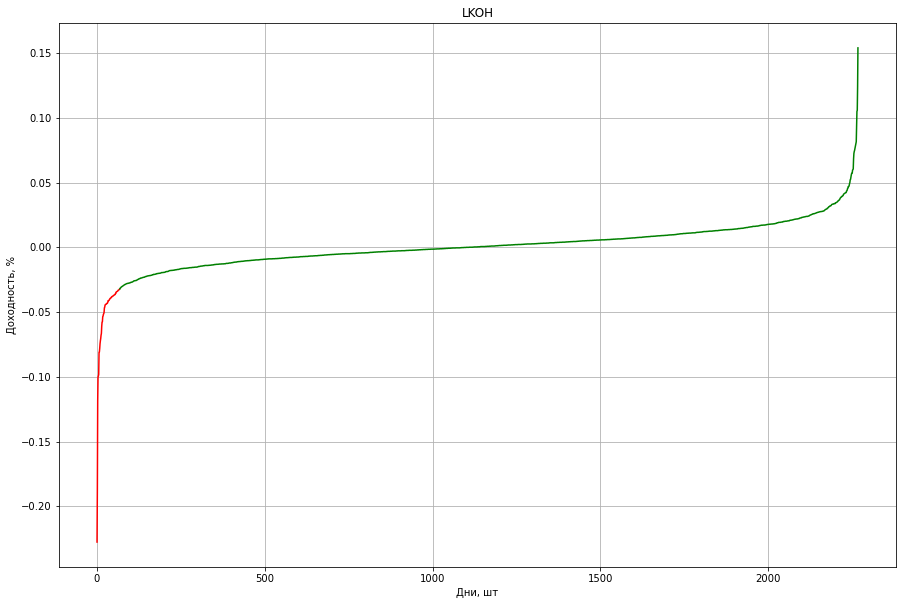

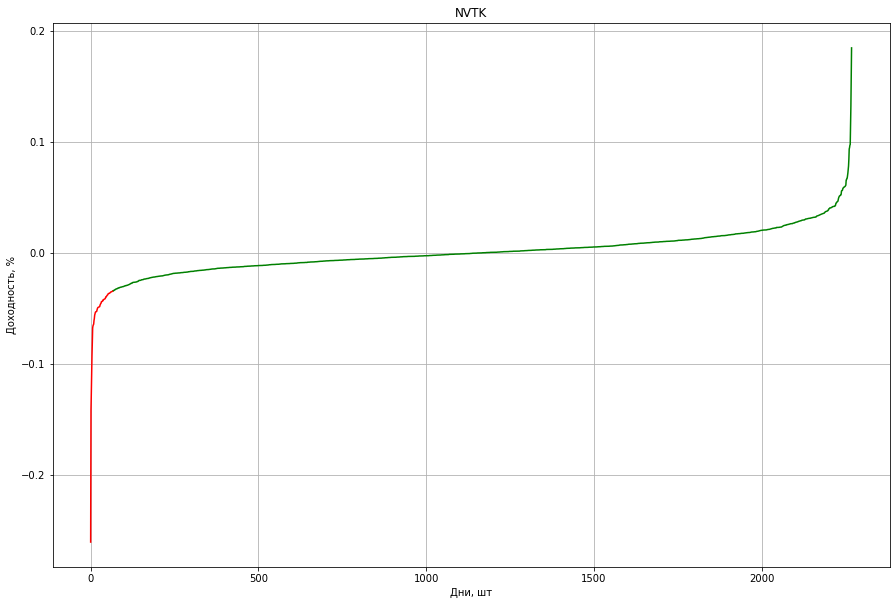

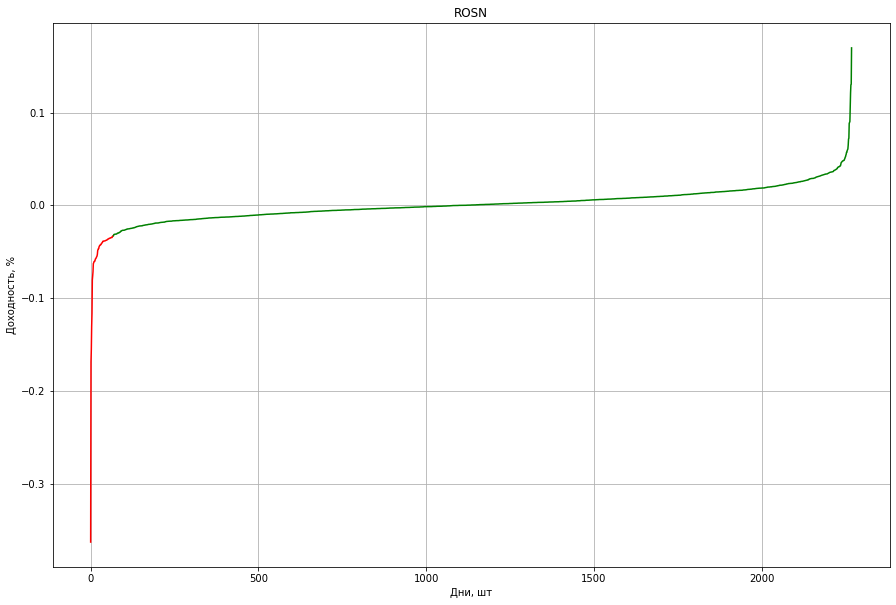

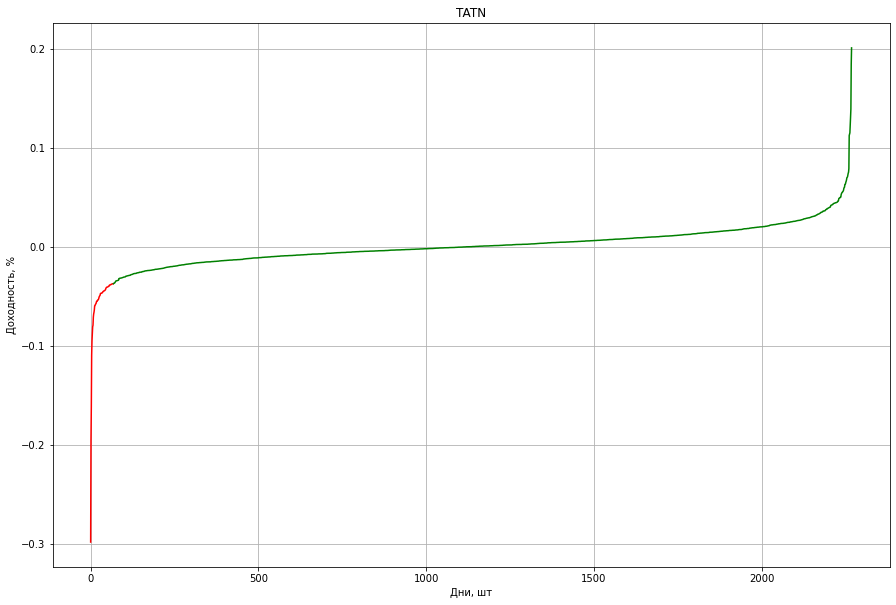

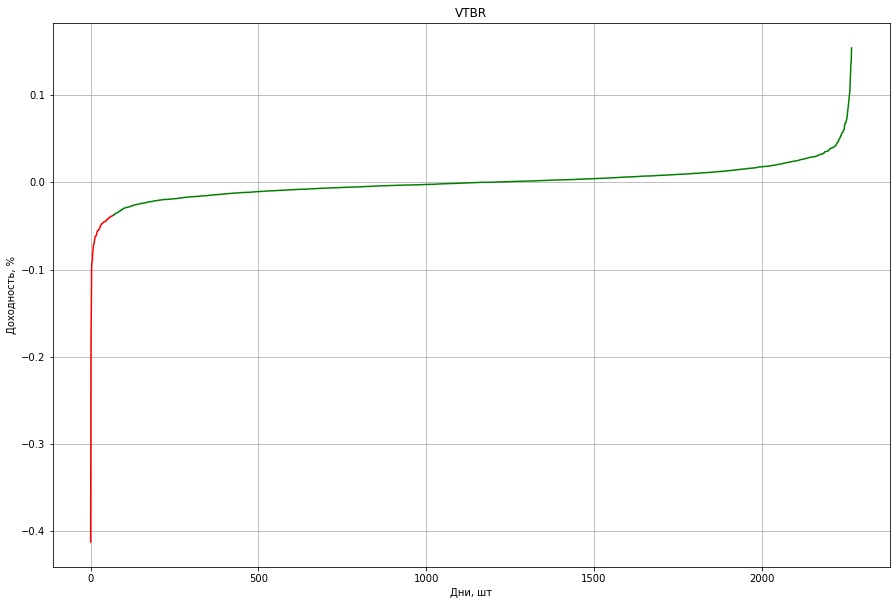

In [44]:
for file_name in files_data.keys():
    cut_cases = sorted_data[file_name][:coef]
    remain_cases = sorted_data[file_name][coef:len(sorted_data[file_name])]
    
    plt.figure(figsize=(15, 10))
    plt.title(file_name.rsplit(".csv")[0])
    plt.plot(range(len(cut_cases)), cut_cases, color='red')
    plt.plot(range(len(cut_cases), len(remain_cases) + len(cut_cases)), remain_cases, color='green')
    plt.xlabel('Дни, шт')
    plt.ylabel('Доходность, %')
    plt.grid()
    plt.show()

In [45]:
# Риск портфеля

In [46]:
for file_name in files_data.values():
  file_name['Цена'] = [float((price.replace('.', '')).replace(',', '.')) for price in file_name['Цена']]

In [47]:
portfolio = list()
tmp = 0

for file_name in files_data:
    tmp += files_data[file_name]['Цена']
portfolio = list(tmp)

In [48]:
portfolio_profit = [(portfolio[i] - portfolio[i-1]) * 100 / portfolio[i-1] for i in range(len(portfolio)-1)]

In [49]:
portfolio_profit = np.sort(portfolio_profit)
portfolio_ = int(len(portfolio_profit)*alpha)
VaR_st = -portfolio_profit[portfolio_]
print('VaR портфеля = {var} %'.format(var=VaR_st))

VaR портфеля = 2.719568772610662 %


In [50]:
# Доходность портфеля

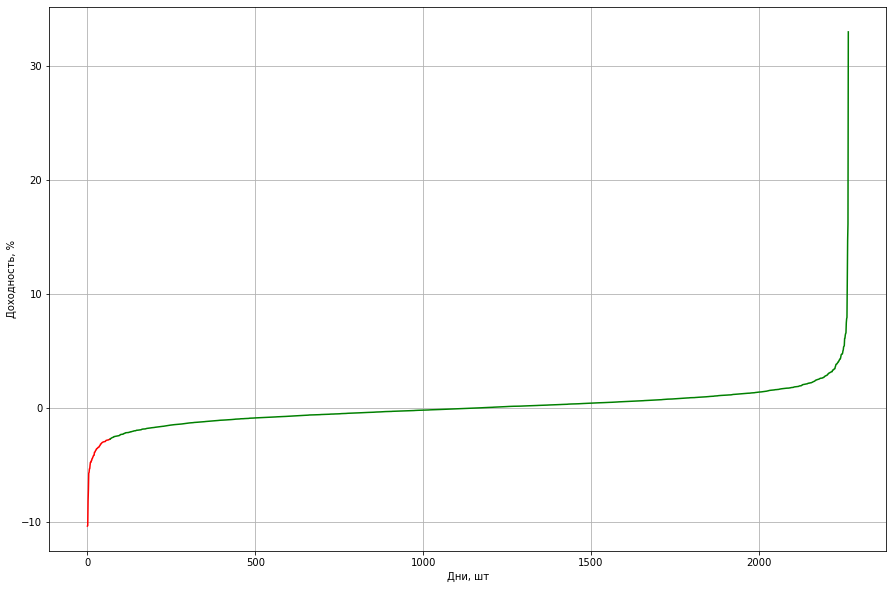

In [19]:
cut_cases = portfolio_profit[:portfolio_coef]
remain_cases = portfolio_profit[portfolio_coef:len(portfolio_profit)]
plt.figure(figsize=(15, 10))
plt.plot(range(len(cut_cases)), cut_cases, color='red')
plt.plot(range(len(cut_cases), len(remain_cases) + len(cut_cases)), remain_cases, color='green')
plt.xlabel('Дни, шт')
plt.ylabel('Доходность, %')
plt.grid()
plt.show()

In [20]:
# Суммарный VaR

In [21]:
import random

# T - период
# k - расчитываем изменение цены акции за k дней
T = len(portfolio)
k = 2

bid_ask = dict.fromkeys(files_data.keys())
for file_name, data in files_data.items():
  bid_ask[company] = [random.uniform(price - 7, price + 7) for price in files_data[file_name]['Цена']]

# print(mid_bid_ask_prices)


In [22]:
U = dict.fromkeys(files_data.keys())
U_star = dict.fromkeys(files_data.keys())

T_ = 0
for file_name in files_data.keys():
    T_ = len(bid_ask[file_name])
    U[file_name] = np.log(bid_ask[file_name][k:])- np.log(bid_ask[file_name][:T_-k])
    U[file_name] = np.sort(U[file_name])
    U_star[file_name] = -U[file_name][int(alpha*(T_-k))]
    print('LVaR_{name} = {val} %'.format(name=file_name.rsplit('.csv')[0], val=U_star[file_name]*100))

LVaR_GAZP = 10.9113495238228 %
LVaR_SBER = 9.772489459630584 %
LVaR_MGNT = 5.2880117260539095 %
LVaR_GMKN = 13.749172952612021 %
LVaR_LKOH = 4.909319820757574 %
LVaR_NVTK = 5.5654515762327605 %
LVaR_ROSN = 6.492525564659335 %
LVaR_TATN = 6.316599039411397 %
LVaR_VTBR = 12.370470519598875 %


In [23]:
# Суммарный VaR всего портфеля

In [24]:
T_min = len(mid_bid_ask_prices['GAZP.csv'])
for file_name in files_data.keys():
    if (T_min > len(mid_bid_ask_prices[file_name])):
        T_min = len(mid_bid_ask_prices[file_name])

In [25]:
mid_bid_ask_portfolio = 0

for file_name in files_data:
    mid_bid_ask_portfolio += np.array(mid_bid_ask_prices[file_name][:T_min])

U_portfolio = np.log(mid_bid_ask_portfolio[k:]) - np.log(mid_bid_ask_portfolio[:T_min-k])
U_portfolio = np.sort(U_portfolio)
U_portfolio_star = U_portfolio[int(alpha*(T_min-k))]
VaR_sum = -U_portfolio_star

In [26]:
print('LVaR портфеля = {val} %'.format(val=-U_portfolio_star*100))

LVaR портфеля = 3.809199952500286 %


In [27]:
# Оценка ликвидности портфеля

In [28]:
for company in files_data.keys():
    absolute_liquidity_assessment = (U_star[company] + sorted_data[company][coef])*100
    relative_liquidity_assessment = U_star[company] / (-sorted_data[company][coef])
    print ('Абсолютное значение риска ликвидности {company} = {val}%'.format(company=company.rsplit(".csv")[0], val=absolute_liquidity_assessment))
    print ('Относительное значение риска ликвидности {company} = {val} \n'.format(company=company.rsplit(".csv")[0], val=relative_liquidity_assessment))

Абсолютное значение риска ликвидности GAZP = 7.771349523822798%
Относительное значение риска ликвидности GAZP = 3.4749520776505727 

Абсолютное значение риска ликвидности SBER = 6.1024894596305845%
Относительное значение риска ликвидности SBER = 2.662803667474274 

Абсолютное значение риска ликвидности MGNT = 1.6380117260539098%
Относительное значение риска ликвидности MGNT = 1.4487703359051807 

Абсолютное значение риска ликвидности GMKN = 10.35917295261202%
Относительное значение риска ликвидности GMKN = 4.055803230859003 

Абсолютное значение риска ликвидности LKOH = 1.7093198207575737%
Относительное значение риска ликвидности LKOH = 1.5341624439867418 

Абсолютное значение риска ликвидности NVTK = 2.1754515762327604%
Относительное значение риска ликвидности NVTK = 1.6417261286822302 

Абсолютное значение риска ликвидности ROSN = 3.2125255646593356%
Относительное значение риска ликвидности ROSN = 1.979428525810773 

Абсолютное значение риска ликвидности TATN = 2.586599039411397%
Отн

In [29]:
COL = VaR_sum - VaR_st
ML = VaR_sum / VaR_st
print('Абсолютное значение риска ликвидности портфеля = {val}%'.format(val=COL))
print('Относительное значение риска ликвидности портфеля = {val}'.format(val=ML))

Абсолютное значение риска ликвидности портфеля = -2.681476773085659%
Относительное значение риска ликвидности портфеля = 0.014006632194278463


In [52]:
# Монте-Карло

In [53]:
# Определение параметров
confidence_level = 0.97
num_simulations = 10000

In [54]:
for file_name in files_data:
    prices = files_data[file_name]['Цена']
    returns = np.log(prices / prices.shift(1)).dropna()

    mean_return = returns.mean()
    std_dev = returns.std()

    simulated_returns = np.random.normal(mean_return, std_dev, (num_simulations, len(returns)))

    initial_investment = 1
    portfolio_values = initial_investment * (1 + simulated_returns).cumprod(axis=1)

    portfolio_losses = initial_investment - portfolio_values[:, -1]
    VaR = np.percentile(portfolio_losses, (1 - confidence_level) * 100)
    print('VaR_Monte_Carlo_{name} = {val}'.format(name=file_name.rsplit('.csv')[0], val=VaR))


VaR_Monte_Carlo_GAZP = -2.1429156985300084
VaR_Monte_Carlo_SBER = -0.2378791606745888
VaR_Monte_Carlo_MGNT = -7.340298421993625
VaR_Monte_Carlo_GMKN = -1.3362555094666526
VaR_Monte_Carlo_LKOH = -0.09414562954701387
VaR_Monte_Carlo_NVTK = -0.7899789715543772
VaR_Monte_Carlo_ROSN = -0.8681351805552272
VaR_Monte_Carlo_TATN = -0.8556668951572426
VaR_Monte_Carlo_VTBR = -14.539777309149386


In [ ]:
# for file_name in files_data.values():
#   file_name['Цена'] = [float((price.replace('.', '')).replace(',', '.')) for price in file_name['Цена']]
# portfolio = list()
# tmp = 0

# for file_name in files_data:
#     tmp += files_data[file_name]['Цена']
# portfolio = list(tmp)
# portfolio_profit = [(portfolio[i] - portfolio[i-1]) * 100 / portfolio[i-1] for i in range(len(portfolio)-1)]

# portfolio_profit = np.sort(portfolio_profit)
# portfolio_ = int(len(portfolio_profit)*alpha)
# VaR_st = -portfolio_profit[portfolio_]
# print('VaR портфеля = {var} %'.format(var=VaR_st))

In [58]:
# LVaR методом Монте-Карло для всего портфеля

In [61]:
# в нашем случае веса равны
n_companies = len(files_data)
weights = {company: 1/n_companies for company in files_data}

# подготовка данных
returns_data = {company: np.array(df['Изм. %']) for company, df in files_data.items()}

# портфельные доходности
portfolio_returns = np.zeros(n_iterations)

# Монте-Карло симуляция
for i in range(num_simulations):
    portfolio_return = 0
    for company, ret_array in returns_data.items():
        sampled_return = np.random.choice(ret_array)
        portfolio_return += weights[company] * sampled_return
    portfolio_returns[i] = portfolio_return
    
var_percentile = (1 - confidence_level) * 100
var = -np.percentile(portfolio_returns, var_percentile)

print('VaR_Monte_Carlo портфеля = {val}'.format(val=var))

VaR_Monte_Carlo портфеля = 0.012433333333333333
